# Mod 5 Project: Classifying Life Expectancy 
## (World Health Organization Data)

**Group Partners: Filis, Manisha, Pablo**

___

Ran the following commands in terminal to install Profiling (visualizing data), and Altair (map):

```
conda install -c conda-forge altair vega_datasets notebook vega
```

```
conda install -c anaconda pandas-profiling
```

## Import libraries

In [1]:
#Data Manipulation
import pandas as pd  
import numpy as np

# #Making Map Visualizations
# import altair as alt
# alt.renderers.enable('notebook')
# from vega_datasets import data

# #Making Line Plot Visualizations
# import plotly.plotly as py 
# import cufflinks as cf 
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
# init_notebook_mode(connected=True) 
# cf.go_offline()

#Displaying EDA Profile
import pandas_profiling

#Disabling warnings 
import warnings
warnings.filterwarnings('ignore')

# Classifiers
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn import svm

# Measuring models and feature importance
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn processing stuff
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn import preprocessing

## Read in csv and display first five rows

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Dimensions of dataset 

In [3]:
df.shape

(2938, 22)

## Check for NaN's in out entire dataset

In [4]:
df.isna().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 BMI                                34
 thinness  1-19 years               34
 thinness 5-9 years                 34
Diphtheria                          19
Polio                               19
Adult Mortality                     10
Life expectancy                     10
under-five deaths                    0
 HIV/AIDS                            0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
Year                                 0
Country                              0
dtype: int64

## Visualizing the distribution of our potential target variable, life expectancy

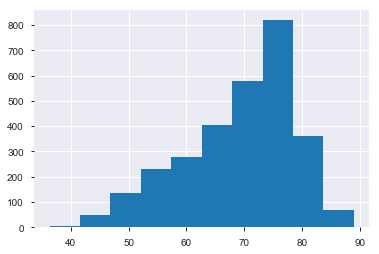

In [5]:
df['Life expectancy '].hist()

## Seeing any trend of the life expectancies with respect to years

In [6]:
# #This plot of life expectancies is of one country with respect to years. 
# df_group.loc['Albania'].iplot(y='Life expectancy ')
# print('Albania')


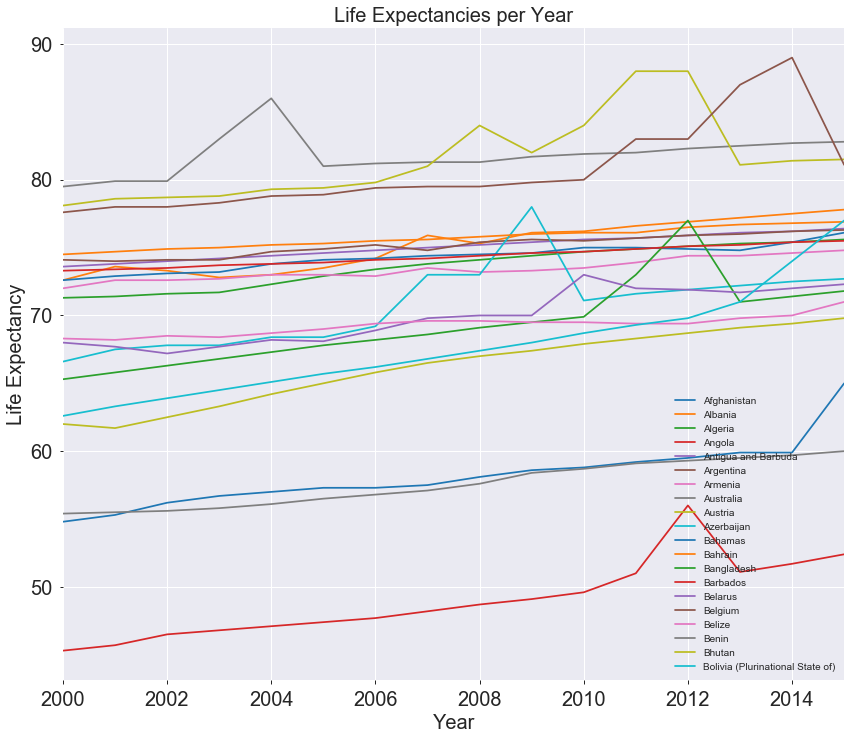

In [7]:
df_group = df.set_index(['Country', 'Year'])
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
countries = df['Country'].unique()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
plt.ylabel('Life Expectancy', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.title('Life Expectancies per Year', fontsize=20)

for country in countries[:20]:
    df_group.loc[country].plot(y='Life expectancy ', ax=ax)
L = plt.legend(countries[:20])

plt.savefig('Life Expectacies per Year.png')

#### Finding: Most countries appear relatively flat, indicating a small correlation with time dependence. We investigate this more below. 

## Using profiling to speed up exporatory data analysis (EDA)

In [8]:
# profile = pandas_profiling.ProfileReport(df)

In [9]:
# from IPython.core.display import display, HTML
# display(HTML(profile.html))


## Displaying the columns in our dataset

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Column descriptions

`Status`
Developed or Developing status

`Life expectancy` 
Life Expectancy in age

`Adult Mortality`
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

`infant deaths`
Number of Infant Deaths per 1000 population

`Alcohol`
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

`percentage expenditure`
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

`Hepatitis B`
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

`Measles` 
Measles - number of reported cases per 1000 population

`BMI` 
Average Body Mass Index of entire population

`under-five deaths` 
Number of under-five deaths per 1000 population

`Polio`
Polio (Pol3) immunization coverage among 1-year-olds (%)

`Total expenditure`
General government expenditure on health as a percentage of total government expenditure (%)

`Diphtheria` 
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

`HIV/AIDS`
Deaths per 1 000 live births HIV/AIDS (0-4 years)

`GDP`
Gross Domestic Product per capita (in USD)

`Population`
Population of the country

`thinness 1-19 years`
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

`thinness 5-9 years`
Prevalence of thinness among children for Age 5 to 9(%)

`Income composition of resources`
Human Development Index in terms of income composition of resources (index ranging from 0 to 1) url: http://hdr.undp.org/en/content/human-development-index-hdi

`Schooling`
Number of years of Schooling(years)

In [11]:
df.corr()[1:2]

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,0.170033,1.0,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975


## Visualizing the global life expectancy for 2015 using Altair mapping

In [12]:
print('Maximum year is', df['Year'].max())
print('Minimum year is', df['Year'].min())


Maximum year is 2015
Minimum year is 2000


Let's filter by 2015 to make a map of life expectency per country. 

In [13]:
df_2015 = df[df['Year']==2015]

Reading in the country codes tsv to make the map (file generated from UN stats webpage: 
https://unstats.un.org/unsd/methodology/m49/  

In [14]:
country_codes = pd.read_csv('country_code_2.tsv',sep='\t')
country_codes.head()

,Country or Area,M49 code,ISO-alpha3 code
0,Afghanistan,4,AFG
1,Aland Islands,248,ALA
2,Albania,8,ALB
3,Algeria,12,DZA
4,American Samoa,16,ASM


 Matching countries to country names in country codes tsv data

In [15]:
df_2015.replace("Côte d'Ivoire", "Cote d'Ivoire", inplace=True)
df_2015.replace('Swaziland', 'Eswatini', inplace=True)
df_2015.replace('The former Yugoslav republic of Macedonia', 'North Macedonia', inplace=True)

df_2015_map = df_2015.merge(country_codes, how="left", left_on="Country",right_on="Country or Area")
df_2015_map.rename(columns={'M49 code': 'id'}, inplace=True)
df_2015_map.drop(columns=['ISO-alpha3 code', 'Country or Area'], inplace=True)

df_2015_map['tooltip']=df_2015_map['Country']+': '+df_2015_map['Life expectancy '].astype(str) + ' yr'

### Making the map!

In [16]:
# source = alt.topo_feature(data.world_110m.url,'countries')

# map_plot = alt.Chart(source).mark_geoshape().encode(
#     color=alt.Color('Life expectancy :Q', legend=alt.Legend(title='Years')),
#     tooltip='tooltip:N'
# ).transform_lookup(
#    lookup='id',
#    from_=alt.LookupData(df_2015_map, 'id', ['Life expectancy ', 'tooltip'])
# ).project(
#    type='equirectangular'
# ).properties(
#     width=900,
#     height=540,
#     title=('Life Expectency in Years')
# )


In [17]:
# map_plot

#### Finding: The country with the highest life-expectancy is Slovenia (Europe) at 88 years, and the lowest is Sierra Leonne (Africa) at 52 years. 

In [18]:
df_group = df.set_index(['Country','Year'])
df_group.head()

Status  Life expectancy   Adult Mortality  \
Country     Year                                                  
Afghanistan 2015  Developing              65.0            263.0   
            2014  Developing              59.9            271.0   
            2013  Developing              59.9            268.0   
            2012  Developing              59.5            272.0   
            2011  Developing              59.2            275.0   

                  infant deaths  Alcohol  percentage expenditure  Hepatitis B  \
Country     Year                                                                
Afghanistan 2015             62     0.01               71.279624         65.0   
            2014             64     0.01               73.523582         62.0   
            2013             66     0.01               73.219243         64.0   
            2012             69     0.01               78.184215         67.0   
            2011             71     0.01                7.097109         68.0   

                  Measles    BMI   under-five deaths   Polio  \
Country     Year                                               
Afghanistan 2015      1154   19.1                  83    6.0   
            2014       492   18.6                  86   58.0   
            2013       430   18.1                  89   62.0   
            2012      2787   17.6                  93   67.0   
            2011      3013   17.2                  97   68.0   

                  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
Country     Year                                                          
Afghanistan 2015               8.16         65.0        0.1  584.259210   
            2014               8.18         62.0        0.1  612.696514   
            2013               8.13         64.0        0.1  631.744976   
            2012               8.52         67.0        0.1  669.959000   
            2011               7.87         68.0        0.1   63.537231   

                  Population   thinness  1-19 years   thinness 5-9 years  \
Country     Year                                                           
Afghanistan 2015  33736494.0                   17.2                 17.3   
            2014    327582.0                   17.5                 17.5   
            2013  31731688.0                   17.7                 17.7   
            2012   3696958.0                   17.9                 18.0   
            2011   2978599.0                   18.2                 18.2   

                  Income composition of resources  Schooling  
Country     Year                                              
Afghanistan 2015                            0.479       10.1  
            2014                            0.476       10.0  
            2013                            0.470        9.9  
            2012                            0.463        9.8  
            2011                            0.454        9.5

## Drop all NaN's and check remaining length of dataframe

In [19]:
df_nona = df.dropna()

In [20]:
df_nona.shape

(1649, 22)

## Rename "Life expectancy" column as "target"

In [21]:
df_nona.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
df_nona.rename(columns={'Life expectancy ':'target'}, inplace=True)

In [23]:
df_nona.head()

,Country,Year,Status,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Spliting the data at the median value, and anything a above that age will be 1 for long life expectancy and 0 for low life expectancy. 

In [24]:
df_nona['target'].describe()

count    1649.000000
mean       69.302304
std         8.796834
min        44.000000
25%        64.400000
50%        71.700000
75%        75.000000
max        89.000000
Name: target, dtype: float64

In [25]:
median_age = np.median(df_nona['target'])
df_nona['target'] = df_nona.target.apply(lambda x: 1 if x >= median_age  else 0)

In [26]:
df_nona.target.value_counts()

1    828
0    821
Name: target, dtype: int64

In [27]:
df_nona.head()

,Country,Year,Status,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,0,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,0,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,0,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,0,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Checking stationarity with respect to the year column 

In [28]:
# Count records the number of countries which are stationary
# The countries printed below (20% of all of our countries in total) may not be stationary -- the life expectancy changed
count = 0 
for country in df_nona['Country'].unique() : 
    check = df_nona.loc[df_nona['Country']== country, 'target'].nunique()
    if (check == 1):
      
        count +=1
    else:
        print(country)

Azerbaijan
Bangladesh
Belarus
Brazil
Bulgaria
Cabo Verde
Colombia
Dominican Republic
El Salvador
Guatemala
Honduras
Iraq
Latvia
Lithuania
Maldives
Mauritius
Morocco
Nicaragua
Romania
Russian Federation
Samoa
Sri Lanka
Suriname
Thailand
Tonga
Trinidad and Tobago
Turkey
Ukraine
Vanuatu


In [29]:
count / df_nona['Country'].nunique()

0.7819548872180451

## Finding #1:
### For 80% of the countries, life-expectency remained stationary. 20% may be non-stationary but overall have a small effect. Thus the life-expectancy does not depend on year. 
<br/>


## Get dummies for status column (categorical)

In [30]:
#developed = 0, developing =1
#look into dropping one
df_nona = pd.concat([df_nona, pd.get_dummies(df_nona['Status'])], axis=1)
df_nona.head()

,Country,Year,Status,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,Developing,0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,Developing,0,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,Developing,0,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,Developing,0,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,Developing,0,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


## Dropping old status column 

In [31]:
df_nona.drop(['Status'], axis=1, inplace=True)
df_nona.head()

,Country,Year,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


# Machine Learning

In [32]:
all_countries = df.Country.unique()
# Choose random countries
num_countries_to_withhold = 100
withhold_countries = set([])
while len(withhold_countries) < num_countries_to_withhold:
    # Get a random integer so we can choose a random country
    withhold_countries.add(all_countries[randint(0, len(all_countries) - 1)])

withhold_countries = list(withhold_countries)
training_countries = [country for country in all_countries if (country not in withhold_countries)]


df_country_split_a = df_nona[df_nona['Country'].isin(training_countries)]
df_country_split_b = df_nona[df_nona['Country'].isin(withhold_countries)]

num_countries_to_withhold/len(all_countries)

0.5181347150259067

In [33]:
num_countries_to_withhold/len(all_countries)

0.5181347150259067

#### We only train the model on 50% of our countries to check whether the country has an effect on life-expectency. 

## Define X and y
We train on group a and predict on group b

In [34]:
y = df_country_split_a['target']
X = df_country_split_a.drop(['target'], axis=1)

In [35]:
X.drop(['Country'], axis=1, inplace = True)

## Split data 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Decision Tree

In [37]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [38]:
y_pred = classifier.predict(X_test)  

In [39]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :91.53439153439153

AUC is :0.92

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,91,10,101
1,6,82,88
All,97,92,189


In [40]:
# The model misclassified 33 rows

In [41]:
classifier.feature_importances_

array([0.00409801, 0.18794948, 0.        , 0.02129373, 0.        ,
       0.        , 0.02089555, 0.05673548, 0.        , 0.        ,
       0.        , 0.00901852, 0.00666215, 0.01774478, 0.00532343,
       0.        , 0.00608392, 0.63835157, 0.02584337, 0.        ,
       0.        ])

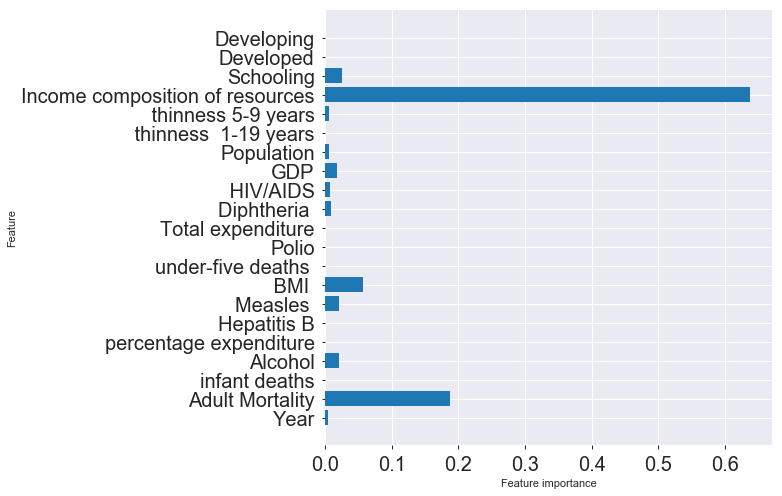

In [42]:
classifier.feature_importances_
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(classifier)

The Income composition of resources which is the Human Development Index combines education, life expectency, and GNI index (economic factor). 

## Random Forest  
without Income composition of resources and Adult Mortality

In [110]:
X.drop(['Adult Mortality','Income composition of resources','Year'], axis=1, inplace=True)


KeyError: "['Adult Mortality' 'Income composition of resources' 'Year'] not found in axis"

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Grid Searching to find Optimal Hyperparameters

In [144]:
forest=RandomForestClassifier(random_state=20)

param_grid = {
    'n_estimators': [20,40,60,80,100],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

gs = GridSearchCV(forest, param_grid, cv=5, return_train_score=True)

In [145]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=20,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [146]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [147]:
gs.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

In [148]:
#best mean test score across different combinations of hyperparameters
gs.best_score_

0.9485815602836879

In [159]:
gs_cv_df=pd.DataFrame(gs.cv_results_)
gs_cv_df=gs_cv_df[gs_cv_df['params']=={'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}]
gs_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.14169,0.02434,0.012077,0.00238,2,2,100,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.938053,0.946903,...,0.948582,0.020478,1,0.993348,0.997783,0.995565,0.993348,0.995575,0.995124,0.00166


In [150]:
gs_cv_df=pd.DataFrame(gs.cv_results_)
gs_cv_df=gs_cv_df[gs_cv_df['rank_test_score']==1]
gs_cv_df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.141690,0.024340,0.012077,0.002380,2,2,100,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.938053,0.946903,...,0.948582,0.020478,1,0.993348,0.997783,0.995565,0.993348,0.995575,0.995124,0.001660
9,0.118126,0.017722,0.010340,0.001285,2,4,100,"{'min_samples_leaf': 2, 'min_samples_split': 4...",0.938053,0.946903,...,0.948582,0.020478,1,0.993348,0.997783,0.995565,0.993348,0.995575,0.995124,0.001660
11,0.044302,0.000977,0.004670,0.000183,2,6,40,"{'min_samples_leaf': 2, 'min_samples_split': 6...",0.946903,0.946903,...,0.948582,0.022660,1,0.991131,0.988914,0.993348,0.986696,0.988938,0.989805,0.002259


#### Random Forest with Optimized Hyperparameters and Multiple Metric Scoring

In [160]:
#running random forest with optimized paramaters from grid search
forest2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [161]:
scoring = ['accuracy','precision', 'recall', 'f1']                
rfc_cv=cross_validate(forest2, X_train,y_train, cv=5, scoring=scoring, return_train_score=True)

In [162]:
type(rfc_cv)

dict

In [163]:
rfc_cv_df=pd.DataFrame.from_dict(rfc_cv)
rfc_cv_df=rfc_cv_df.round(2)
rfc_cv_df.head()

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.13,0.04,0.94,0.99,0.91,0.99,0.96,1.0,0.94,0.99
1,0.11,0.04,0.95,1.00,0.95,1.00,0.95,1.0,0.95,1.00
2,0.12,0.04,0.92,1.00,0.86,0.99,1.00,1.0,0.92,1.00
3,0.11,0.04,0.98,0.99,0.98,0.99,0.98,1.0,0.98,0.99
4,0.15,0.04,0.96,1.00,0.93,0.99,0.98,1.0,0.95,1.00


In [164]:
rfc_cv_df.mean()

fit_time           0.124
score_time         0.040
test_accuracy      0.950
train_accuracy     0.996
test_precision     0.926
train_precision    0.992
test_recall        0.974
train_recall       1.000
test_f1            0.948
train_f1           0.996
dtype: float64

In [166]:
##need to fix rounding of test scores
print('Average Train Scores: ', 'Accuracy: ', rfc_cv_df.train_accuracy.mean(), 'Precision: ', rfc_cv_df.train_precision.mean(), 'Recall: ', rfc_cv_df.train_recall.mean(), ' F1: ', rfc_cv_df.train_f1.mean())
print('Average Test Scores: ', 'Accuracy: ', rfc_cv_df.test_accuracy.mean(), 'Precision: ', rfc_cv_df.test_precision.mean(), 'Recall: ', rfc_cv_df.test_recall.mean(), 'F1: ', rfc_cv_df.test_f1.mean())

Average Train Scores:  Accuracy:  0.9960000000000001 Precision:  0.992 Recall:  1.0  F1:  0.9960000000000001
Average Test Scores:  Accuracy:  0.95 Precision:  0.9259999999999999 Recall:  0.974 F1:  0.9480000000000001


In [158]:
## attempt to generate cross-validated prediction labels to generate a confusion matrix
rfc_cv_predict=cross_val_predict(X_train,y_train, cv=5)

TypeError: Cannot clone object '      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2502              3     5.52              131.042127         88.0        37   
1898            521     8.90              133.123087         49.0      8491   
350               2     5.48              306.952735         87.0         1   
229               0    14.44                8.494095         96.0         1   
2739              5     7.99               29.381727         96.0     42724   
2208              0     3.85               47.736382         46.0         0   
1799              3     0.01              796.873426         84.0        86   
338               2     0.01                1.117811         95.0         1   
34               21     0.53              544.450743         95.0        25   
1190           1100     3.00               64.605901         44.0     33634   
553               2     7.33             1275.689625         95.0         0   
1370             66     1.97               59.833614         81.0      1516   
283              25     1.15               10.736281         75.0       262   
2491              2     0.01              708.955665         98.0         0   
2428              1     9.35             4255.781693         96.0      1204   
1556             29     0.87               79.508825         74.0         6   
1525              0    15.14             1807.071336         93.0         0   
1668              0     0.01              115.278428         97.0         0   
91               11     7.63              719.366380         81.0         0   
1816             20     0.26               80.587884          9.0      3362   
2155             14     8.34                9.074569         97.0        31   
2848              0     0.83              361.094098         62.0         0   
2365              0     0.99              229.668749         99.0         0   
2373              0     1.18               16.831706         79.0         0   
27                1     4.54              221.842800         99.0         7   
637               1     4.04             1070.268999         86.0         1   
235               1    12.05               42.334439         99.0         2   
2133              4     9.78              180.109513         98.0        10   
1982             11     0.81              103.727773         59.0         0   
396               1    11.19               32.386161         96.0         0   
...             ...      ...                     ...          ...       ...   
1331              4     0.41               63.878452         98.0        20   
23                1     5.61               36.622068         99.0         0   
1622             54     0.61              101.811400         66.0        24   
390               1    10.93              661.514433         96.0      2249   
233               1    12.60              364.426052         98.0       149   
1798              3     0.01              760.655055         89.0      1028   
1899            527     9.05               14.567647         63.0      1272   
638               1     4.17              112.949375         94.0         0   
2153             12     0.01               11.710907         98.0        17   
2053              3     7.74              466.738311         95.0       133   
1627             57     0.53               67.709207          9.0       128   
2438              2    12.26              228.354302         82.0        67   
1822             31     0.20               45.879899         69.0      2838   
857               6     0.49               11.765723         94.0         0   
1784             47     0.33               21.236988          4.0      2046   
1469              1     2.10              618.361486         75.0       213   
859               7     0.97               10.602698         94.0       128   
1033              0     9.51             3682.887170         95.0         1   
566             248     4.88               50.283489         99.0     52461   
1038              0     9.46             2124.921517         92.0         0   
1619             52     0.01               46.562317         73.0       290   
1943            359     0.01               62.293611         72.0      1370   
2156             16     7.92               63.787236         97.0       121   
361              70     7.10               30.303747         99.0        57   
393               1    10.39              508.630459         96.0         1   
2398             43     7.28             1038.885632         71.0     12499   
2703              6     2.35               37.884661         97.0         0   
138               0    12.40             5992.588029         86.0         9   
683               0    11.41             1562.520827         88.0         1   
83                9     8.35             1133.558003         91.0         2   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
2502   26.7                   4   87.0               5.16         85.0   
1898   22.2                 817   54.0               3.47         54.0   
350     3.5                   4   97.0               5.73         97.0   
229    59.3                   1   99.0               5.55         98.0   
2739   56.8                   6   99.0               6.39         98.0   
2208    7.9                   0   49.0               5.25         53.0   
1799   33.3                   4   84.0               8.24         84.0   
338    36.8                   2   96.0               5.84         95.0   
34     57.2                  24   95.0               7.12         95.0   
1190   16.4                1500   79.0               4.33         82.0   
553    58.1                   2   94.0               6.18         94.0   
1370   17.3                 100   76.0               4.80         81.0   
283     2.1                  39   74.0               4.56         72.0   
2491   31.2                   3   98.0               9.66         98.0   
2428   64.8                   2   97.0               9.39         97.0   
1556   19.5                  40   73.0               4.15         74.0   
1525    6.9                   0   93.0               6.67         93.0   
1668   32.8                   0   98.0               4.81         97.0   
91     56.3                  12   91.0               6.84         98.0   
1816   17.4                  25    9.0               5.89          9.0   
2155   18.9                  20   93.0               7.71         97.0   
2848   48.2                   0   66.0               3.90         66.0   
2365   47.2                   0   99.0               5.80         99.0   
2373    4.4                   0   84.0               6.00         84.0   
27     48.9                   1   98.0               6.38         97.0   
637    48.3                   1   88.0               8.45         88.0   
235    56.2                   1   99.0               6.59         99.0   
2133   51.9                   5   99.0               4.36         99.0   
1982   43.4                  14   76.0               4.60         63.0   
396    58.6                   1   96.0               7.43         96.0   
...     ...                 ...    ...                ...          ...   
1331   64.8                   4   98.0               7.45         98.0   
23     52.6                   1   99.0               5.87         99.0   
1622   21.3                  90   72.0               6.59         66.0   
390    62.1                   1   94.0               6.78         94.0   
233    57.2                   1   97.0               6.34         99.0   
1798   34.1                   3   89.0               8.53         89.0   
1899   21.6                 832   66.0               4.24         63.0   
638    47.3                   1   94.0               8.23         94.0   
2153    2.1                  17   98.0               7.69         98.0   
2053   53.6                   3   98.0               5.86         98.0   
1627   18.5                  98   79.0               6.56         78.0   
2438   58.8                   2   98.0               7.25         98.0   
1822   14.4                  41   91.0               5.70         89.0   
857    15.1                   9   94.0               3.69         94.0   
1784    2.5                  61    9.0               1.87         84.0   
1469    6.2                   1   74.0               8.91         75.0   
859    14.3                   9   94.0               3.30         94.0   
1033   62.4                   0   99.0               9.76         99.0   
566    27.3                 288   99.0               5.80         99.0   
1038   59.2                   1   93.0               8.61         94.0   
1619   23.2                  85   74.0               6.86         73.0   
1943   24.7                 442   72.0               2.61         72.0   
2156   18.3                  23   93.0               7.91         97.0   
361    48.6                  79   99.0               8.36         99.0   
393     6.3                   1   96.0               6.67         95.0   
2398   47.2                  62   72.0               8.50         72.0   
2703   43.4                   8   97.0               1.88         96.0   
138    52.7                   0   86.0               1.53         86.0   
683    55.3                   0   98.0               6.37         98.0   
83     61.0                  10   99.0               5.20         91.0   

       HIV/AIDS           GDP    Population   thinness  1-19 years  \
2502       49.9   1324.996228  1.893000e+03                    8.6   
1898        4.8   2327.326700  1.585783e+08                   11.3   
350        37.2   3128.977930  1.754935e+06                   11.8   
229         0.1     63.388770  9.495830e+05                    2.0   
2739        0.8    233.188310  4.678775e+06                    2.6   
2208        0.1    322.543121  1.822860e+05                    0.2   
1799        3.7   5749.447520  2.263934e+06                    9.5   
338         2.8     77.625783  2.128570e+05                    7.0   
34          0.1   5471.866766  3.833856e+07                    5.9   
1190        0.2   1461.671957  1.247236e+08                   26.9   
553         0.1   9484.681227  1.631979e+07                    0.9   
1370        9.1    839.181117  3.885990e+05                    8.4   
283         2.1    583.493514  7.754000e+03                    8.9   
2491        9.8   3598.759720  1.271456e+06                    4.5   
2428        0.1  28562.293240  4.677355e+06                    0.6   
1556        0.4    461.723722  2.296115e+07                    7.3   
1525        0.1  14341.836000  2.987773e+06                    2.7   
1668        0.1   1153.938220  1.269340e+05                    7.0   
91          0.1   4251.574348  3.872870e+07                    1.1   
1816        0.2    681.792587  2.764992e+07                   16.3   
2155        1.3    617.317648  1.516710e+05                    6.3   
2848        0.1   2643.441423  2.378500e+04                    1.5   
2365        0.1   1642.837974  5.396140e+05                    1.2   
2373        0.1    744.765742  4.467690e+05                    1.3   
27          0.1   2416.588235  3.269390e+05                    1.8   
637         0.1   4167.714170  4.125971e+06                    2.2   
235         0.1   2378.339270  9.731460e+05                    2.4   
2133        0.1   1839.729450  2.213197e+06                    3.8   
1982        1.3   1178.724690  6.787187e+06                    1.4   
396         0.1    271.468240  7.775327e+06                    2.3   
...         ...           ...           ...                    ...   
1331        0.1    466.947750  8.893600e+04                    3.9   
23          0.1    437.539647  2.947314e+06                    1.6   
1622        1.5    835.889980  1.554989e+06                    8.5   
390         0.1   6955.987733  7.444443e+06                    2.0   
233         0.1   3848.215966  9.649240e+05                    2.2   
1798        2.5   5488.131712  2.316520e+05                    9.0   
1899        4.9    197.661422  1.544218e+07                   11.7   
638         0.1    462.149650  4.632400e+04                    2.2   
2153        0.5    688.876856  1.165151e+06                    5.9   
2053        0.1   4981.198619  3.824876e+06                    2.5   
1627        1.8    521.642580  1.322764e+06                    9.7   
2438        0.1   1719.535410  4.143156e+07                    0.6   
1822        0.2    348.631453  2.594618e+06                   17.4   
857         1.1    326.825642  4.232636e+06                    9.1   
1784        0.5   1186.423937  5.553310e+05                   13.0   
1469        0.1   5424.223560  3.863267e+06                    4.7   
859         1.4    297.828588  4.666480e+05                    9.3   
1033        0.1  31997.282100  1.177841e+06                    0.8   
566         0.1   3838.434292  1.331260e+05                    4.4   
1038        0.1  18477.578410  1.928700e+04                    0.8   
1619        1.6    825.572992  1.696285e+07                    7.9   
1943        0.1   1316.989660  1.855463e+08                   19.4   
2156        2.3    563.491487  1.246842e+06                    6.5   
361         0.1    586.145975  1.891241e+07                    3.1   
393         0.1   4513.136280  7.612200e+04                    2.2   
2398       11.0   7362.761390  5.979432e+06                    7.3   
2703        0.1    436.459223  5.795000e+03                    3.2   
138         0.1  38242.425200  8.227829e+06                    1.7   
683         0.1  25324.486660  1.276580e+05                    0.9   
83          0.1  12969.771200  4.296739e+06                    1.0   

       thinness 5-9 years  Schooling  Developed  Developing  
2502                  8.8        9.2          0           1  
1898                 11.2        9.5          0           1  
350                  11.8       11.8          0           1  
229                   2.2       15.5          0           1  
2739                  2.7       14.7          0           1  
2208                  0.2       12.9          0           1  
1799                  9.4       11.5          0           1  
338                   6.7       12.6          0           1  
34                    5.8       14.4          0           1  
1190                 27.7       10.8          0           1  
553                   0.9       14.9          0           1  
1370                  8.3       10.1          0           1  
283                   8.8        8.1          0           1  
2491                  4.6       11.4          0           1  
2428                  0.5       17.2          1           0  
1556                  7.2       10.3          0           1  
1525                  2.7       16.5          1           0  
1668                  6.9       14.7          0           1  
91                    1.0       16.3          0           1  
1816                 16.7       12.3          0           1  
2155                  6.2       10.2          0           1  
2848                  1.5       10.7          0           1  
2365                  1.2        9.4          0           1  
2373                  1.3        8.0          0           1  
27                    1.9       10.9          0           1  
637                   2.1       12.1          0           1  
235                   2.5       14.1          0           1  
2133                  4.2       11.7          1           0  
1982                  1.3        8.9          0           1  
396                   2.4       12.9          1           0  
...                   ...        ...        ...         ...  
1331                  3.9       13.1          0           1  
23                    1.6       12.0          0           1  
1622                  8.3        7.5          0           1  
390                   2.1       13.8          1           0  
233                   2.4       14.6          0           1  
1798                  8.9       11.6          0           1  
1899                 11.6        9.3          0           1  
638                   2.2       11.9          0           1  
2153                  5.9       10.8          0           1  
2053                  2.7       14.7          1           0  
1627                  9.5        6.1          0           1  
2438                  0.5       15.7          1           0  
1822                 18.0        9.6          0           1  
857                   9.1        5.2          0           1  
1784                 13.3        9.1          0           1  
1469                  4.6       14.2          0           1  
859                   9.3        5.3          0           1  
1033                  0.7       15.9          0           1  
566                   3.8       12.2          0           1  
1038                  0.8       15.2          0           1  
1619                  7.7        8.2          0           1  
1943                 19.8        7.8          0           1  
2156                  6.3       10.0          0           1  
361                   3.1       13.8          0           1  
393                   2.2       13.5          1           0  
2398                  8.9       12.8          0           1  
2703                  3.3       10.5          0           1  
138                   1.9       14.9          1           0  
683                   1.0       13.5          1           0  
83                    0.9       17.2          0           1  

[564 rows x 18 columns]' (type <class 'pandas.core.frame.DataFrame'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [ ]:
type(rfc_cv_predict)

#### Random Forest Test Score

In [167]:
forest2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [168]:
y_pred_test=forest2.predict(X_test)

In [169]:
forest2.score(X_test,y_test)

0.91005291005291

In [171]:
acc = accuracy_score(y_pred_test,y_test) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :91.005291005291

AUC is :0.92

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,85,16,101
1,1,87,88
All,86,103,189


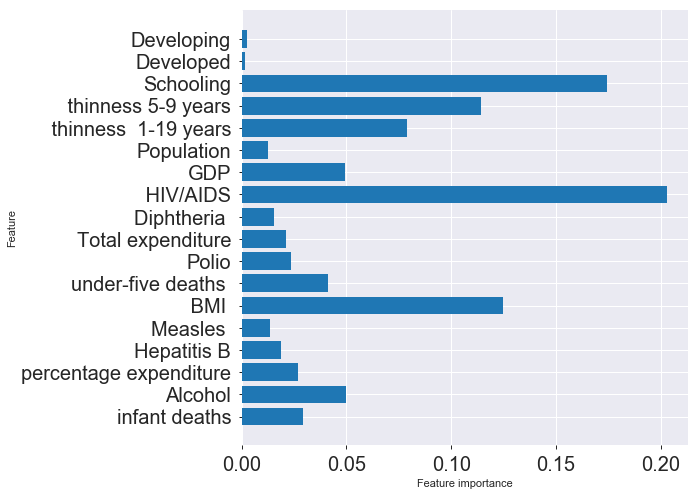

In [104]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(forest2)

## Predict life expectancy for group B

We want to see how the model performs when presented with data from countries it has never seen. If the performance doesn't drop much, the country has little effect on the life expectancy.

In [172]:
df_country_split_b.head()

,Country,Year,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [173]:
y_test_2 = df_country_split_a['target']
X_test_2 = df_country_split_a.drop(['Country', 'target','Adult Mortality','Income composition of resources', 'Year'], axis=1)
y_pred_2 = forest2.predict(X_test_2)

acc = accuracy_score(y_test_2,y_pred_2) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_2, y_pred_2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_2, y_pred_2, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :97.34395750332006

AUC is :0.97

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,372,19,391
1,1,361,362
All,373,380,753



It's 88% accurate on countries it is never seen before when 70 countries (36%) were completely withheld from training. 

When we increased the number to 100 countries (trained on the remaining), the accuracy dropped to 85%



### Conclusions:
Our model, in addition to life expectancy, is able to draw attention to 
some modifiable features/areas countries' can focus on regardless of their 
classification 

Features of high importance in our classification model included 
schooling length (in years), vaccination rates (diphtheria, pertussis, tetanus, measles, mumps, rubella, polio), HIV/AID prevalence,  and weight
